odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])
<class 'numpy.ndarray'>
[108.35  108.741 109.176 110.102 111.666]


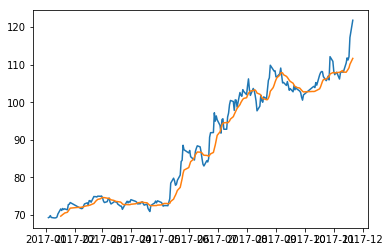

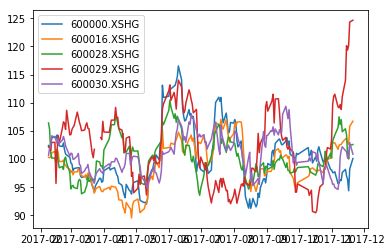

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import numpy as np
from datetime import datetime
import talib as ta
import pandas as pd
import warnings
import talib.abstract
warnings.filterwarnings('ignore')


df = pd.read_excel('sz50.xlsx', sheet_name=None, index_col=0)


data = df.copy()
for i in (df.keys()):
    if(df[i].empty):
        data.pop(i)
print(data.keys())



nArray = data['600036.XSHG']['close'].values
ma10=talib.SMA(nArray, timeperiod=10)
print(type(nArray))
print(ma10[ma10.size-5:ma10.size])

ma10Series = pd.DataFrame(ma10,index=data['600036.XSHG'].index)

plt.plot(data['600036.XSHG'].index,data['600036.XSHG']['close'])
plt.plot(ma10Series.index,ma10Series)
plt.show()

#用talib计算50只股票的周期为5的ROCR100，生成Dataframe
dateIndex=data['600000.XSHG'].index
#某几支股票的date不全，取全index按索引添加
ROCR100df=pd.DataFrame(index=dateIndex)
for name in data.keys():
    closeArray = data[name]['close'].values
    ROCR100Array=talib.ROCR100(closeArray,timeperiod = 20)
    ROCR100=pd.DataFrame(ROCR100Array,index=data[name].index.values,columns=[name])
    ROCR100df=pd.merge(ROCR100df,ROCR100,left_index=True,right_index=True,how='left')

p1,=plt.plot(ROCR100df.index,ROCR100df.iloc[:,0])
p2,=plt.plot(ROCR100df.index,ROCR100df.iloc[:,1])
p3,=plt.plot(ROCR100df.index,ROCR100df.iloc[:,2])
p4,=plt.plot(ROCR100df.index,ROCR100df.iloc[:,3])
p5,=plt.plot(ROCR100df.index,ROCR100df.iloc[:,4])
plt.legend([p1,p2,p3,p4,p5],ROCR100df.columns.values[0:5])
plt.show()